## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [2]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("api.env")

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [5]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["MSFT","KO"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.tail()

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2020-04-27 04:00:00+00:00,174.050,176.90,173.30,303523,176.59,36084915,174.775755,MSFT
2020-04-28 04:00:00+00:00,169.810,175.67,169.39,337986,175.59,37340912,171.553523,MSFT
2020-04-29 04:00:00+00:00,177.430,177.68,171.88,433876,173.22,56779806,176.433005,MSFT
2020-04-30 04:00:00+00:00,179.129,180.40,176.23,421059,180.00,59215658,178.703097,MSFT
2020-05-01 04:00:00+00:00,174.570,178.64,174.01,326287,175.80,43462932,175.738301,MSFT


In [6]:
# Reorganize the DataFrame
# Separate ticker data
MSFT = df_ticker[df_ticker['symbol']=='MSFT'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([MSFT, KO], axis=1, keys=["MSFT", "KO"])

# Display sample data
df_ticker

MSFT                                       \
                             close    high      low trade_count    open   
timestamp                                                                 
2017-05-01 04:00:00+00:00   69.410   69.55   68.500      159426   68.68   
2017-05-02 04:00:00+00:00   69.300   69.71   69.130      127337   69.71   
2017-05-03 04:00:00+00:00   69.080   69.38   68.710      146505   69.38   
2017-05-04 04:00:00+00:00   68.810   69.08   68.640      109655   69.03   
2017-05-05 04:00:00+00:00   69.000   69.03   68.485       94878   68.90   
...                            ...     ...      ...         ...     ...   
2020-04-27 04:00:00+00:00  174.050  176.90  173.300      303523  176.59   
2020-04-28 04:00:00+00:00  169.810  175.67  169.390      337986  175.59   
2020-04-29 04:00:00+00:00  177.430  177.68  171.880      433876  173.22   
2020-04-30 04:00:00+00:00  179.129  180.40  176.230      421059  180.00   
2020-05-01 04:00:00+00:00  174.570  178.64  174.010      326287  175.80   

                                                    KO                 \
                             volume        vwap  close    high    low   
timestamp                                                               
2017-05-01 04:00:00+00:00  34710004   69.174376  43.22  43.500  43.10   
2017-05-02 04:00:00+00:00  26274252   69.412679  43.39  43.440  43.16   
2017-05-03 04:00:00+00:00  31440158   68.948486  43.32  43.485  43.15   
2017-05-04 04:00:00+00:00  22932674   68.821981  43.66  43.810  43.40   
2017-05-05 04:00:00+00:00  21203546   68.818903  43.69  43.840  43.56   
...                             ...         ...    ...     ...    ...   
2020-04-27 04:00:00+00:00  36084915  174.775755  46.78  46.975  45.71   
2020-04-28 04:00:00+00:00  37340912  171.553523  46.74  48.000  46.57   
2020-04-29 04:00:00+00:00  56779806  176.433005  47.12  47.860  46.88   
2020-04-30 04:00:00+00:00  59215658  178.703097  45.89  47.000  45.70   
2020-05-01 04:00:00+00:00  43462932  175.738301  45.60  46.390  45.21   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2017-05-01 04:00:00+00:00       51614  43.16  14259973  43.309815  
2017-05-02 04:00:00+00:00       53704  43.22  12801453  43.332452  
2017-05-03 04:00:00+00:00       49212  43.33  11266228  43.352508  
2017-05-04 04:00:00+00:00       46644  43.42  11128331  43.633275  
2017-05-05 04:00:00+00:00       38312  43.79   9322466  43.674892  
...                               ...    ...       ...        ...  
2020-04-27 04:00:00+00:00      124751  46.00  21370199  46.530450  
2020-04-28 04:00:00+00:00      119238  48.00  18556626  47.108400  
2020-04-29 04:00:00+00:00      112220  47.27  17555825  47.355033  
2020-04-30 04:00:00+00:00      142159  47.00  23652960  46.018609  
2020-05-01 04:00:00+00:00      104392  45.62  16135630  45.635908  

[757 rows x 14 columns]

### The MCForecastTools Library at a Glance

In [7]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [8]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.60, 0.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [9]:
# Printing the simulation input data
MC_fiveyear.portfolio_data

MSFT                                       \
                             close    high      low trade_count    open   
timestamp                                                                 
2017-05-01 04:00:00+00:00   69.410   69.55   68.500      159426   68.68   
2017-05-02 04:00:00+00:00   69.300   69.71   69.130      127337   69.71   
2017-05-03 04:00:00+00:00   69.080   69.38   68.710      146505   69.38   
2017-05-04 04:00:00+00:00   68.810   69.08   68.640      109655   69.03   
2017-05-05 04:00:00+00:00   69.000   69.03   68.485       94878   68.90   
...                            ...     ...      ...         ...     ...   
2020-04-27 04:00:00+00:00  174.050  176.90  173.300      303523  176.59   
2020-04-28 04:00:00+00:00  169.810  175.67  169.390      337986  175.59   
2020-04-29 04:00:00+00:00  177.430  177.68  171.880      433876  173.22   
2020-04-30 04:00:00+00:00  179.129  180.40  176.230      421059  180.00   
2020-05-01 04:00:00+00:00  174.570  178.64  174.010      326287  175.80   

                                                                 KO          \
                             volume        vwap daily_return  close    high   
timestamp                                                                     
2017-05-01 04:00:00+00:00  34710004   69.174376          NaN  43.22  43.500   
2017-05-02 04:00:00+00:00  26274252   69.412679    -0.001585  43.39  43.440   
2017-05-03 04:00:00+00:00  31440158   68.948486    -0.003175  43.32  43.485   
2017-05-04 04:00:00+00:00  22932674   68.821981    -0.003909  43.66  43.810   
2017-05-05 04:00:00+00:00  21203546   68.818903     0.002761  43.69  43.840   
...                             ...         ...          ...    ...     ...   
2020-04-27 04:00:00+00:00  36084915  174.775755    -0.002865  46.78  46.975   
2020-04-28 04:00:00+00:00  37340912  171.553523    -0.024361  46.74  48.000   
2020-04-29 04:00:00+00:00  56779806  176.433005     0.044874  47.12  47.860   
2020-04-30 04:00:00+00:00  59215658  178.703097     0.009576  45.89  47.000   
2020-05-01 04:00:00+00:00  43462932  175.738301    -0.025451  45.60  46.390   

                                                                          \
                             low trade_count   open    volume       vwap   
timestamp                                                                  
2017-05-01 04:00:00+00:00  43.10       51614  43.16  14259973  43.309815   
2017-05-02 04:00:00+00:00  43.16       53704  43.22  12801453  43.332452   
2017-05-03 04:00:00+00:00  43.15       49212  43.33  11266228  43.352508   
2017-05-04 04:00:00+00:00  43.40       46644  43.42  11128331  43.633275   
2017-05-05 04:00:00+00:00  43.56       38312  43.79   9322466  43.674892   
...                          ...         ...    ...       ...        ...   
2020-04-27 04:00:00+00:00  45.71      124751  46.00  21370199  46.530450   
2020-04-28 04:00:00+00:00  46.57      119238  48.00  18556626  47.108400   
2020-04-29 04:00:00+00:00  46.88      112220  47.27  17555825  47.355033   
2020-04-30 04:00:00+00:00  45.70      142159  47.00  23652960  46.018609   
2020-05-01 04:00:00+00:00  45.21      104392  45.62  16135630  45.635908   

                                        
                          daily_return  
timestamp                               
2017-05-01 04:00:00+00:00          NaN  
2017-05-02 04:00:00+00:00     0.003933  
2017-05-03 04:00:00+00:00    -0.001613  
2017-05-04 04:00:00+00:00     0.007849  
2017-05-05 04:00:00+00:00     0.000687  
...                                ...  
2020-04-27 04:00:00+00:00     0.029716  
2020-04-28 04:00:00+00:00    -0.000855  
2020-04-29 04:00:00+00:00     0.008130  
2020-04-30 04:00:00+00:00    -0.026104  
2020-05-01 04:00:00+00:00    -0.006319  

[757 rows x 16 columns]

In [10]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\pablo\OneDrive\Documents\1_Teaching Analytics\Trilogy-2U\Instructor Repository\FinTech Program\_2023 Cohorts\_122023_UC_Berkeley_Laptop\UCB-VIRT-FIN-PT-12-2023-U-LOLC\05-APIs\Class_3_Activities\03-Ins_Portfolio_Forecasting_Monte_Carlo\Unsolved\MCForecastTools.py:119: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999366,1.015337,0.987461,0.982293,0.986496,0.997636,1.001461,1.022612,0.981495,1.007211,...,1.005989,1.005832,1.000159,0.991508,0.996517,0.996388,0.993894,0.994307,0.988641,0.985487
2,0.998059,1.014906,0.971714,0.992616,1.013553,1.004280,0.991488,1.023207,0.999728,0.995453,...,0.992815,1.004737,1.002632,0.981964,0.996722,0.994423,0.989108,0.990932,1.000549,0.977112
3,1.016667,0.983220,0.969081,0.965597,1.004806,0.983291,0.957349,1.036165,0.984712,0.975643,...,0.988961,0.996166,0.998460,0.968717,0.991712,1.005494,0.981784,0.964730,0.993252,0.968205
4,1.029857,0.975274,0.987398,0.964261,0.994495,0.986297,0.970456,1.020641,0.985104,0.963782,...,0.981022,1.002573,1.007094,0.969747,1.005051,1.016685,0.970673,0.959655,0.971383,0.959816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,5.755762,2.438160,4.181378,2.188408,1.401184,1.653311,3.523959,2.634150,1.899760,4.180858,...,2.634968,1.745436,2.746308,5.529233,4.077039,2.326211,2.395278,1.137562,2.229646,1.426083
1257,5.895563,2.444981,4.160058,2.165820,1.390602,1.630083,3.590105,2.631657,1.904176,4.229238,...,2.661544,1.708966,2.737767,5.528418,4.090377,2.343598,2.404130,1.135454,2.294062,1.431515
1258,5.923090,2.461896,4.190772,2.164098,1.414895,1.615126,3.586443,2.631134,1.863326,4.237189,...,2.698195,1.721382,2.773159,5.536516,4.053005,2.321267,2.406191,1.124992,2.314315,1.438686
1259,5.886932,2.522830,4.138589,2.168725,1.427722,1.584848,3.657743,2.672917,1.869410,4.200081,...,2.690773,1.744204,2.766366,5.631846,4.036165,2.294183,2.459710,1.112869,2.328352,1.438428


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

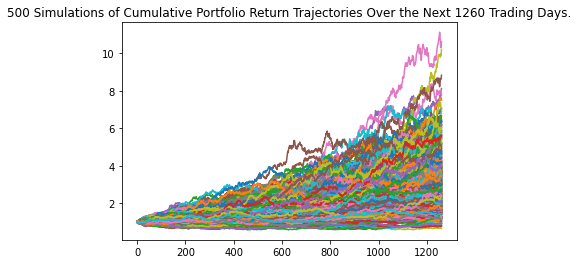

In [11]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()
line_plot

# Save the plot for future usage


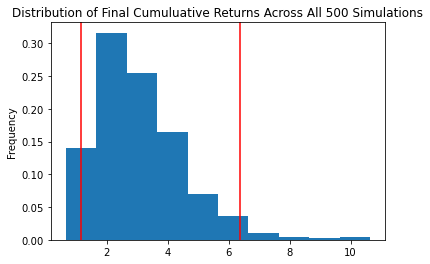

In [12]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage


In [13]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()


# Print summary statistics
print(tbl)


count           500.000000
mean              3.076390
std               1.442802
min               0.653297
25%               2.056501
50%               2.812638
75%               3.774363
max              10.638452
95% CI Lower      1.155237
95% CI Upper      6.366782
Name: 1260, dtype: float64


In [14]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $11552.37 and $63667.82
